In [32]:
import pickle
with open('./run0-8.pickle','rb') as f:
    agglom_res = pickle.load(f)
    
with open('./run9-12.pickle','rb') as f:
    agglom_res.extend(pickle.load(f))

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
len(agglom_res)

13

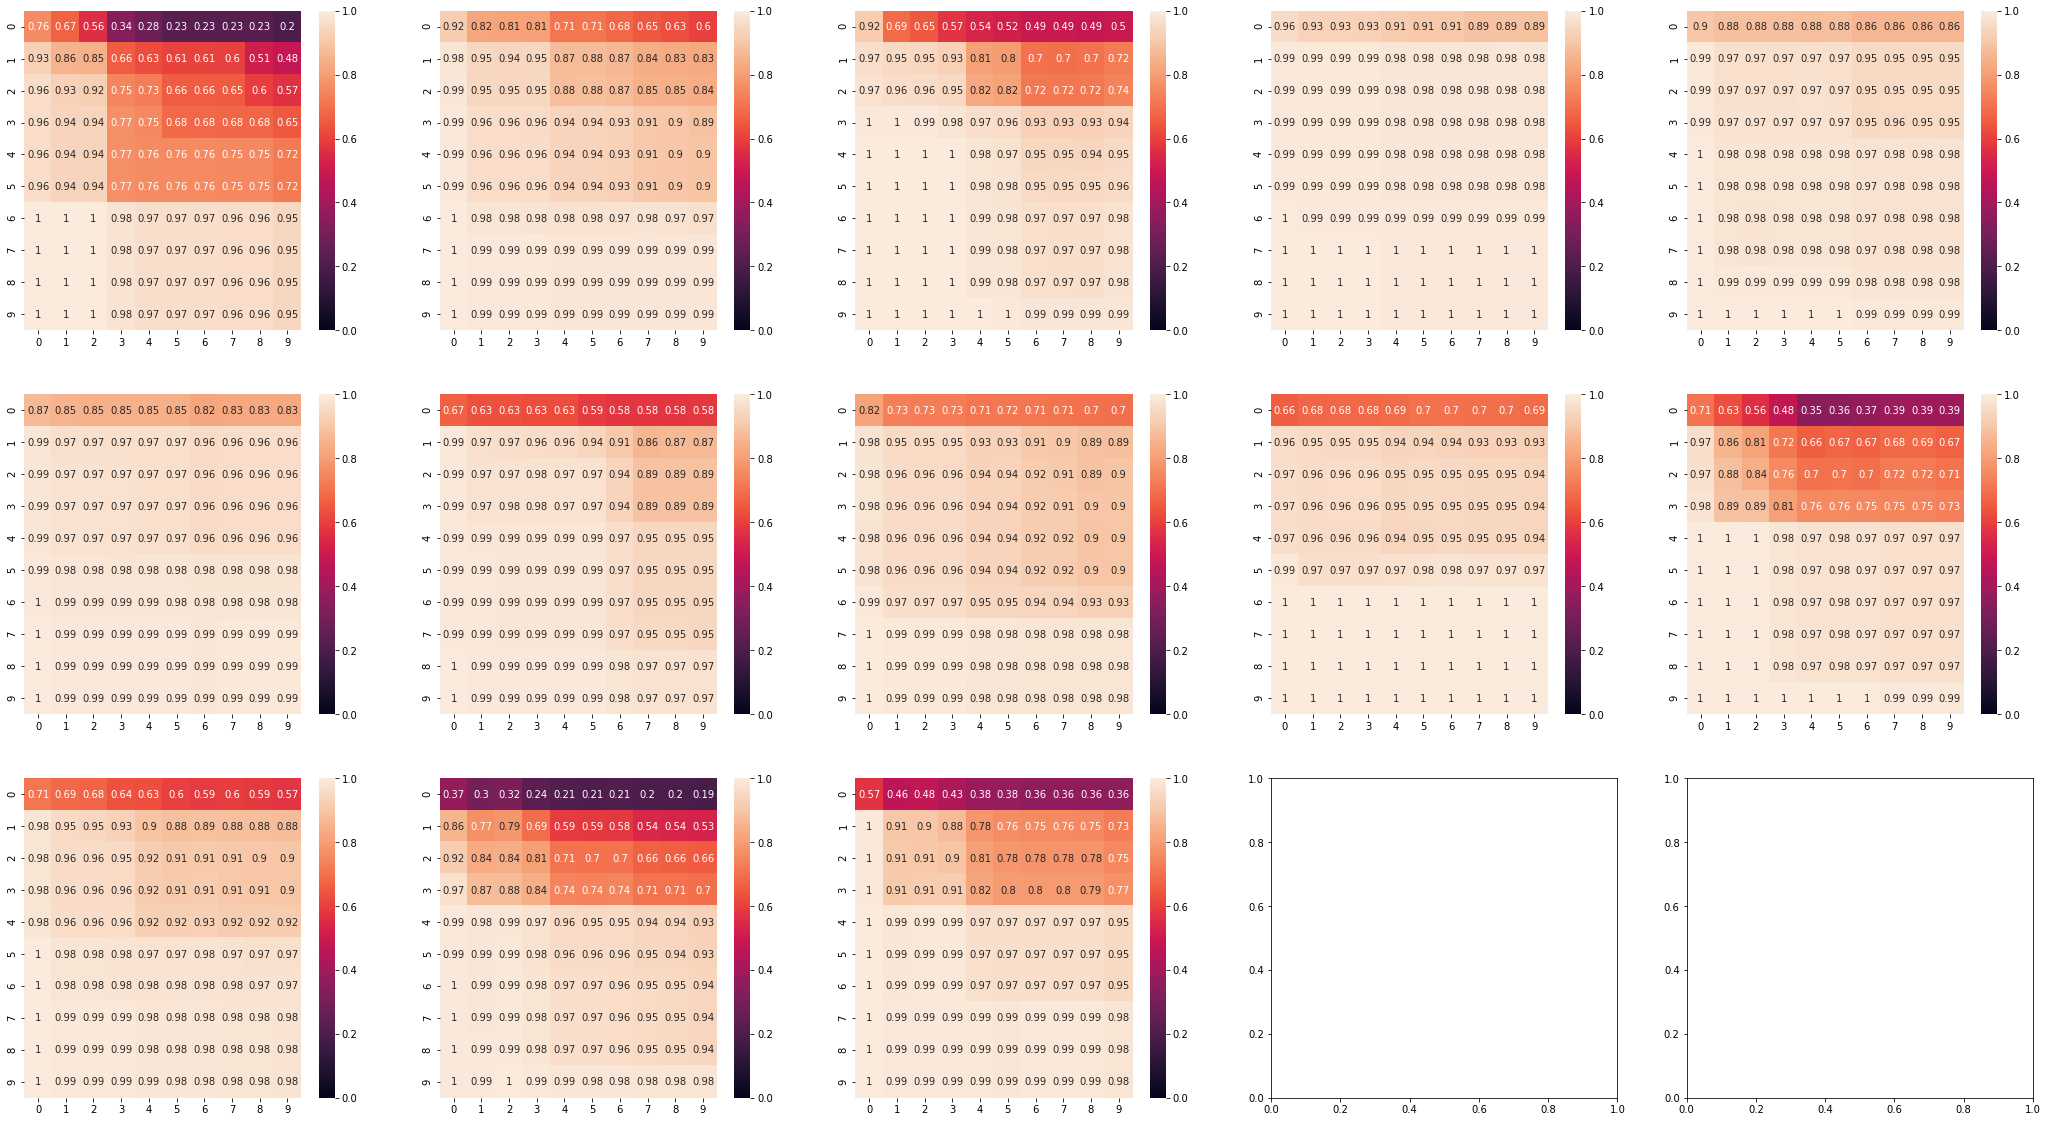

In [43]:
f,ax = plt.subplots(3,5,figsize=(36,20))
ax = ax.flatten()

for g in range(len(agglom_res)):
    sns.heatmap(agglom_res[g]['acc'][:10,:10],vmin=0,vmax=1,annot=True,ax=ax[g])